# Exploratory Data Analysis (EDA) - PProductions

By _Matheus M. M._ - Desafio do programa Lighthouse - Cientista de Dados

## Sumário
 - [**Introdução**](#introduction)                      
 - [**Importando e visualizando Dados**](#data_import) 
 - [**Adequação de dados**](#data_adequation)              
 - [**Análise dos Dados**](#data_analytics)
 - [**Conclusão (questão 2)**](#conclusion)
 - [**Modelagem Preditiva da Nota IMDb (questões 3 e 4)**](#model_imdb)


----

# 1 - Introdução

### Descrição do projeto

**Objetivo do projeto**

O dataset fornecido contém informações sobre dados cinematográficos. O objetivo é explorar padrões e insights que expliquem fatores de sucesso para que possam servir de dados para possíveis próximas criações cinematográficas.

<br>

**Questões que serão respondidas**:
- Qual filme você recomendaria para uma pessoa que você não conhece?
- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
- Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

[Ir para as perguntas respondidas](#questions)

<br>

### Descrição dos dados

**Conteúdo**

O conteúdo de análise será um arquivo .csv contendo 999 linhas, e 15  colunas 

<br>

**Colunas mais relevantes**

| Nome da coluna | Descrição                          |
| :------------- | :--------------------------------- |
| Released\_Year | Ano de lançamento                  |
| Runtime        | Tempo de duração em minutos        |
| IMDB\_Rating   | Nota no IMDb (0–10)                |
| Meta\_score    | Nota da crítica (Metacritic)       |
| No\_of\_Votes  | Número de votos/avaliações no IMDb |
| Gross          | Receita bruta em dólares           |



---

<a id="data_import"></a>
# 2 - Importando e visualizando Dados 

### Configurações inicias

Antes de iniciarmos com nossas análises, é fundamental realizar algumas configurações importantes para preparar o ambiente de trabalho para receber os dados:

***Importação das bibliotecas***

Abaixo foram importadas bibliotecas nececssárias para manipulação dos dados, análise e visualização, sendo elas:

- **pandas:** Para manipulação e análise de dados (apelidado de `pd` para facilitar o manuseio);
    
- **numpy:** Usado para realizar cálculos numéricos estatísticos (apelidado de `np`);
    
- **matplotlib e seaborn:** Usado para a criação de gráficos e visualizações (apelidados respectivamentes de `plt` e `sns`);

- **sklearn:** Para a criação de aprendizado de máquina e muito essencial para o preenchimento de dados de forma inteligente (apelidado `sk`).

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import joblib


***Configurações do Pandas*** 

Abaixo podemos encontrar algumas configurações básicas da bibliotexca `pandas`, para facilitar a leitura dos DataFrames

- **display.max_columns:** Mostra todas as colunas sem esconder nenhuma;

- **float_format:** Formata números para apresentarem apenas duas casas decimais.

In [114]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

***Configurações do Matplotlib*** 

O estilo dos gráficos foi configurado para facilitar a leitura e melhorar a estética:

- **Tamanho da figura padrão:** (16, 5) para gráficos mais horizontais e legíveis;

- Remoção de bordas superiores e laterais (spines), para deixar os gráficos mais limpos;

- **Fonte:** tamanho 12 para manter consistência nos textos;

- **Resolução de imagens:** dpi=300, alta qualidade de imagem ao salvar gráficos;

- Tamanho dos rótulos dos eixos (xtick e ytick): configurados para 11, evitando poluição visual.

In [115]:

from matplotlib import rcParams

rcParams['figure.figsize'] = (16, 5)   
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['font.size'] = 12
rcParams['savefig.dpi'] = 300
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)

Terminamos as configurações básicas, agora podemos partir para a etapa de importação dos dados.

<br>


### Importação de dados

Agora podemos importar os dados da nossa tabela .csv e fazer uma breve visualização dos dados. 

***Importando dados***

Utilizamos a biblioteca `pandas` para obermos os dados brutos e declaramos dentro da variável abaixo denominada `df`. Note que durante todo o projeto vamos sempre alterar e visualizar os dados presentes nesta variável.

In [116]:
df = pd.read_csv("../data/desafio_indicium_imdb.csv", index_col=0)

<br>

### Visão geral dos dados 

Faremos uma breve análise de dados para termos uma ideia sobre quais são os dados que estamos lidando, e qual a qualidade deste dataset e assim poderemos ter uma ideia inicial do que será feito em sequência.  

***Linhas x Colunas***

Na linha de código abaixo, está presente uma visualização básica da quantidade de linhas e colunas presente em nossa base de dados.

In [117]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 999
Número de colunas: 15


***Rápida análise de dados***

Inspecionamos as primeiras e últimas linhas de registro da tabela usando os métodos:

`df.head()`: Mostra os primeiros 5 registros;

`de.tail()`: Mostra os últimos 5 registros; 

Importante essa etapa para termos uma visão inicial dos dados

In [118]:
# Análise dos primeiros registros
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [119]:
# Análise dos últimos registros
df.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.60,A man in London tries to help a counter-espion...,93.00,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


_Nota-se que existem algumas pequenas irregularidades, principalmente quando notamos a ausência de dados em certas células bem sinalizadas como `NaN` (Not a Number)_

***Verificação de tipagem***

Com o comando `df.info()`, analisamos:

- A tipagem de cada coluna;

- O número de valores não nulos;

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB



**Observações iniciais:**

_- A maior parte das colunas é do tipo `object` (Não tem uma tipagem fixa, podendo ser uma mistura de tipagens), sendo preciso posteriormente torná-las uma tipagem fixa;_

_- Existem dados ausentes em algumas colunas._

<br>

***Quantidade de linhas nulas***

Abaixo podemos obter a contagem da quantidade de linhas nulas por cada coluna:

In [121]:
null_rows_count = df.isnull().sum()
print(f"Quantidade de valores totais nulos por coluna:\n{null_rows_count}")

Quantidade de valores totais nulos por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


O resultado também pode ser observado por meio de um heatmap, onde podemos ter uma noção visual de onde os dados estão ausentes:

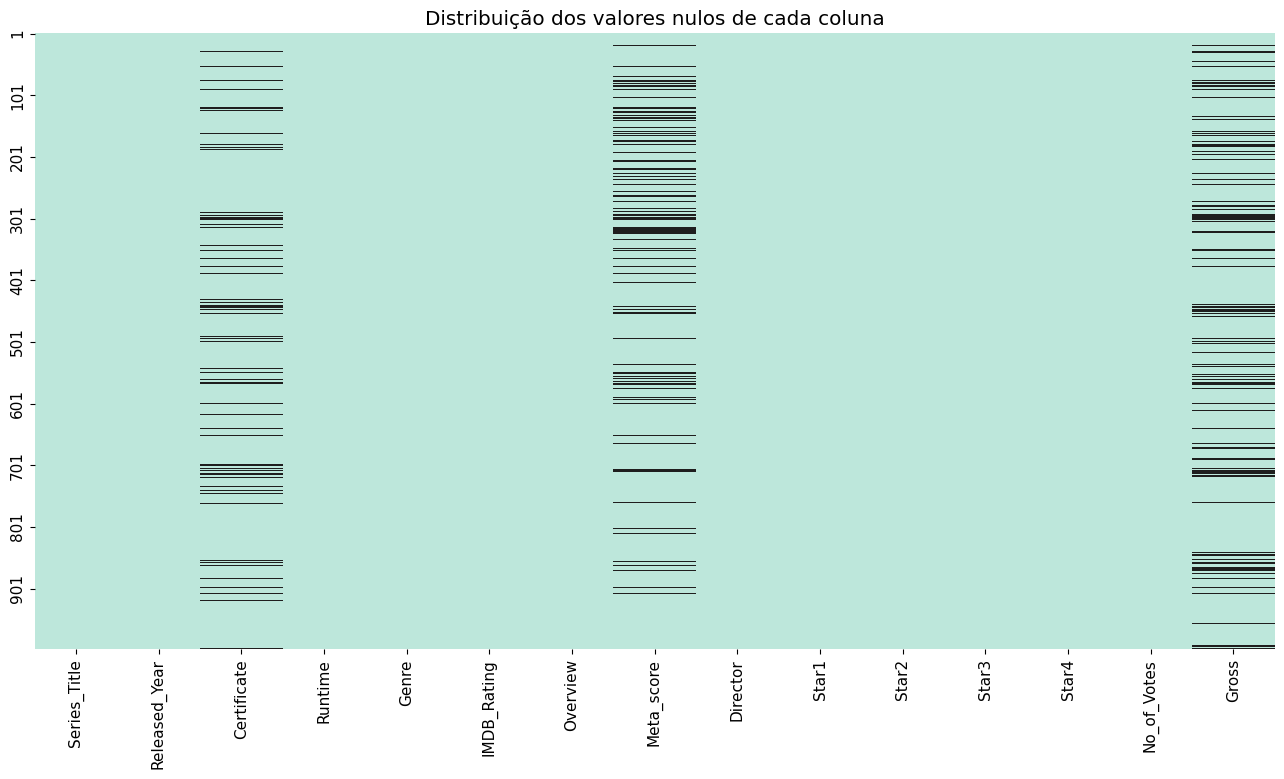

In [122]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=False, center=True, yticklabels=100)
plt.title("Distribuição dos valores nulos de cada coluna")
plt.show();

> Como podemos observar, o grafico acima mostra a posição de cada célula nula encontrada na tabela, assim podemos ter uma ideia mais ampla da distribuição de células nulas e da qualidade dos dados recebidos.

***Duplicatas***

Abaixo podemos obter a quantidade de duplicatas no dataset 

In [123]:
duplicated_data_count = df.duplicated().sum()
print(f"Número de dados duplicados: {duplicated_data_count}")

Número de dados duplicados: 0


**Conclusão**

Analisando os dados fornecidos nesta seção, agora sabemos que temos um dataset com 999 registros e 15 variáveis. Também conseguimos concluir que não possuímos duplicatas, entretanto os dados fornecidos apresentam ausência de dados presente nas colunas `Certificate`, `Meta_score` e `Gross`.

---

<a id="data_adequation"></a>
# 3 - Adequação de dados

### Renomeando variáveis

Antes de prosseguirmos com o tratamento dos dados, antes vamos renomear algumas variáveis para melhor entendimento.

In [124]:
df.rename(columns={"Series_Title": "Title", "Gross": "Gross_Revenue"}, inplace=True)

df.head()

,Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross_Revenue
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Formatação de tipagem dos dados

Agora que temos as informações precisas dos dados, vamos começar a formatar e preencher as colunas desejadas.

In [125]:
# Formatando Released_Year para um tipo numérico e preenchendo valor irregular com a mediana
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Released_Year"] = df["Released_Year"].fillna(df["Released_Year"].median()).astype(int)

# Normalização do Overview separando as palavras por vírgula e convertendo para letras minúsculas
df["Overview"] = df["Overview"].str.strip().str.lower().str.split(", ")

# Gross_Revenue foi convertido para numérico após remover vírgulas e espaços em branco
formatedGross = df["Gross_Revenue"].astype(str).str.replace(',', '').str.strip()
df["Gross_Revenue"] = pd.to_numeric(formatedGross, errors='coerce', downcast='integer')

# Runtime foi convertido para numérico após remover " min"
df["Runtime"] = pd.to_numeric(df["Runtime"].str.replace(" min", ""))

# Normalização dos gêneros para letras minúsculas, remoção de espaços em branco e separação em listas
df["Genre"] = df["Genre"].str.strip().str.lower().str.split(", ")


***Observação:***

_Ao analisar os dados formatados nota-se que existe uma irregularidade em `Released Year` sob uma única célula, e como só havia um valor inválido, foi feita substituição direta com a mediana da coluna, para garantir consistência sem distorcer a distribuição_


<br>

### Preenchendo celulas vazias

Abaixo preenchemos as células nulas presentes nas colunas `Gross_Revenue` e `Meta_score` utilizando a ferramenta `sklearn`, onde criamos um esquema de aprendizado de máquina utilizando variáveis como base para definir padrões e preencher os dados com mais precisão. 

<br>

***Variável Gross (Bilheteria)***

In [126]:

from sklearn import ensemble

rows_with_gross = df.dropna(subset=["Gross_Revenue"])
reference = ["Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes"] 
x_gross = rows_with_gross[reference]
y_gross = rows_with_gross["Gross_Revenue"]

reg = ensemble.RandomForestRegressor(random_state=42)
model = reg.fit(x_gross, y_gross)

missing = df[df["Gross_Revenue"].isna()]
df.loc[df["Gross_Revenue"].isna(), "Gross_Revenue"] = model.predict(missing[reference])


_Para preencher os valores ausentes em `Gross_Revenue`, foi utilizado um modelo **RandomForestRegressor** com as variáveis `Released_Year`, `Runtime`, `IMDB_Rating` e `No_of_Votes`. Foi escolhido este modelo por conta da sua alta precisão e por ter melhor resultado tratando relações não lineares e interações complexas entre variáveis, sendo mais preciso que muitos modelos como o de regressão linear. Com isso conseguimos alcançar uma relação entre características do filme e sua bilheteria estimada com maior acurácia._

<br>

***Variável Meta_score***

In [127]:
from sklearn import linear_model


rows_with_metascore = df.dropna(subset=["Meta_score"])
reference.append("Gross_Revenue")
x_metascore = rows_with_metascore[reference]
y_metascore = rows_with_metascore["Meta_score"]

reg_metascore = linear_model.LinearRegression()
model_metascore = reg_metascore.fit(x_metascore, y_metascore)

missing_metascore = df[df["Meta_score"].isna()]
df.loc[df["Meta_score"].isna(), "Meta_score"] = np.clip(model_metascore.predict(missing_metascore[reference]), 0, 100)

_Já neste caso, para preencher os dados de `Meta_score`, optei por usar um modelo de **regressão linear** por meio das variáveis `Released_Year`, `Runtime`, `IMDB_Rating`, `No_of_Votes` e `Gross_Revenue`. Optei por usar este modelo por sua simplicidade, rapidez de treinamento e por sua boa capacidade de generalização em variáveis contínuas. Também ajustei um limite para impedir que o valor de resposta esteja sempre entre 0 e 100, para manter uma maior consistência com a escala original do `Meta_score`_

<br>

***Variável Certificate***

Neste caso em específico optamos por uma abordagem diferente:

In [128]:
df["Certificate"] = df["Certificate"].fillna("Unknown")


_Embora seja possível e bem plausível treinar um modelo de classificação (ex.: RandomForestClassifier) para prever e preencher os dados presentes nas células vazias de `Certificate`, optou-se por preencher os valores com a categoria "Unknown" por conta da sua baixa relevância, visto que se trata de um metadado descritivo, e por não impactar diretamente nas métricas numéricas como `Gross_Revenue` ou `Meta_score`_


**Conclusão**

"Agora que tratamos os dados ausentes, padronizamos a tipagem, conseguimos ter mais consistência nos dados, nos permitindo avançar para a análise exploratória sem grandes distorções"

---

<a id="data_analytics"></a>
# 4 - Análise dos Dados

### Estatísticas 

A primeira análise foi realizada com o método `describe()`, que apresenta estatísticas descritivas das variáveis numéricas da base.  

Esse passo é importante para termos uma visão inicial sobre **tendências centrais** (média e mediana), **dispersão** (desvio padrão, mínimo e máximo) e possíveis **outliers**.

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.00,"1,991.22",23.30,"1,920.00","1,976.00","1,999.00","2,009.00","2,020.00"
Runtime,999.00,122.87,28.10,45.00,103.00,119.00,137.00,321.00
IMDB_Rating,999.00,7.95,0.27,7.60,7.70,7.90,8.10,9.20
Meta_score,999.00,78.63,11.68,28.00,72.00,80.00,87.00,100.00
No_of_Votes,999.00,"271,621.42","320,912.62","25,088.00","55,471.50","138,356.00","373,167.50","2,303,232.00"
Gross_Revenue,999.00,"59,047,856.29","102,701,281.70","1,305.00","3,323,256.50","17,105,219.00","63,717,813.50","936,662,225.00"


***Principais insights iniciais***

**Valor IMDb** - Analisando as notas do IMDb, podemos observar que todas as notas estão acima de 7.5, indicando que os filmes selecionados nesta tabela são referentes aos melhores filmes avaliados, e podemos observar que a média de `Meta_score` também é relativamente alta, comprovando nossa hipótese;

<br>

**Bilheteria discrepante** - Comparando o valor máximo de `Gross_Revenue` com a mediana, podemos notar a discrepância na arrecadação por título, onde mais da metade dos títulos arrecadaram relativamente pouco;

<br>

**Concentração de lançamentos** - A base de dados cobre mais de um século de lançamentos de títulos de sucesso. Entretanto podemos observar que houve uma concentração maior de lançamentos a partir dos anos 90-2020;

<br>

**Duração média** - Podemos observar que a duração média é de ~2 horas, onde a minoria ultrapassa esse tempo, sendo considerados outliers;

### Rankings

***Top 10 filmes com maior bilheteria***

No gráfico abaixo apresentamos os filmes mais rentáveis em termos de bilheteria (`Gross_Revenue`)

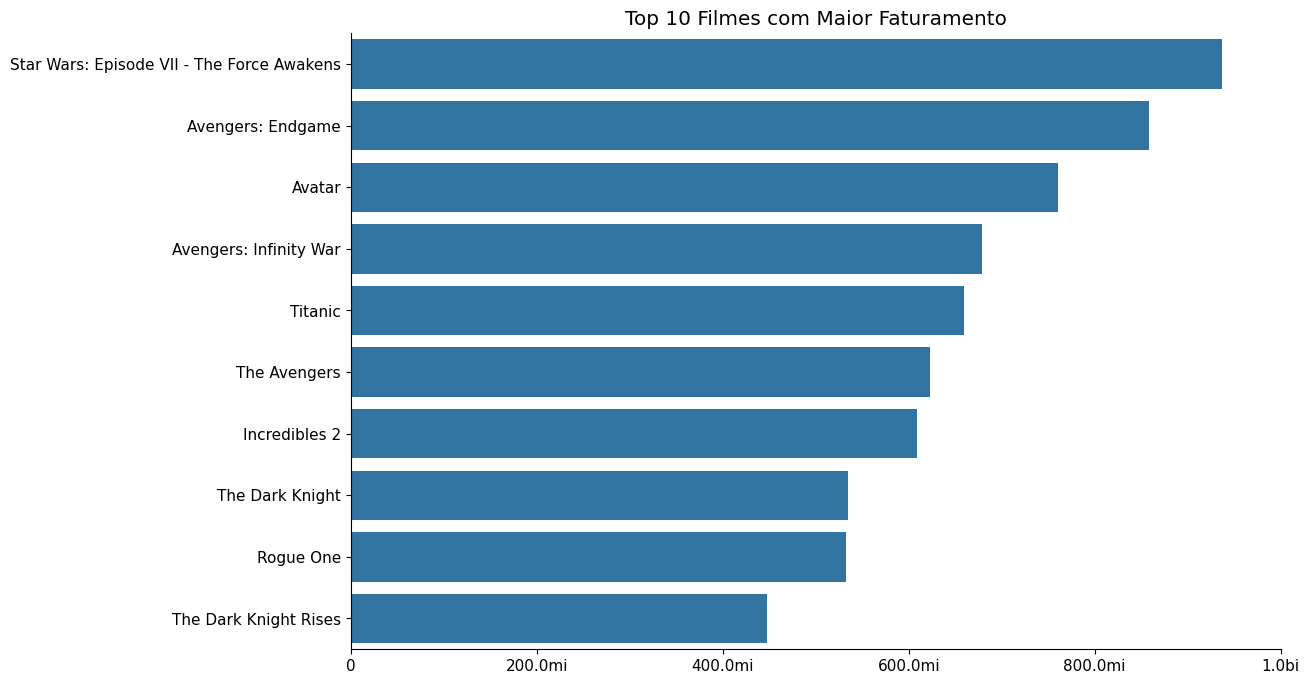

In [130]:
top_gross = df[["Title", "Gross_Revenue"]].sort_values(by="Gross_Revenue", ascending=False).head(10)

# Função básica para formatar valores de Gross_Revenue
def format_gross(x):
    if x >= 1e9:
        return f'{x/1e9:.1f}bi'
    elif x >= 1e6:
        return f'{x/1e6:.1f}mi'
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'
    return str(int(x))

plt.figure(figsize=(12, 8))

sns.barplot(data=top_gross, x="Gross_Revenue", y="Title")
# ax.bar_label(ax.containers[0], fmt='$%d.00', padding=5)
plt.title("Top 10 Filmes com Maior Faturamento")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=plt.xticks()[0], labels=[format_gross(x) for x in plt.xticks()[0]])

plt.show();

***Top 10 filmes com maior nota IMDb***

No grafico abaixo apresentamos os 10 filmes com maior nota do IMDb

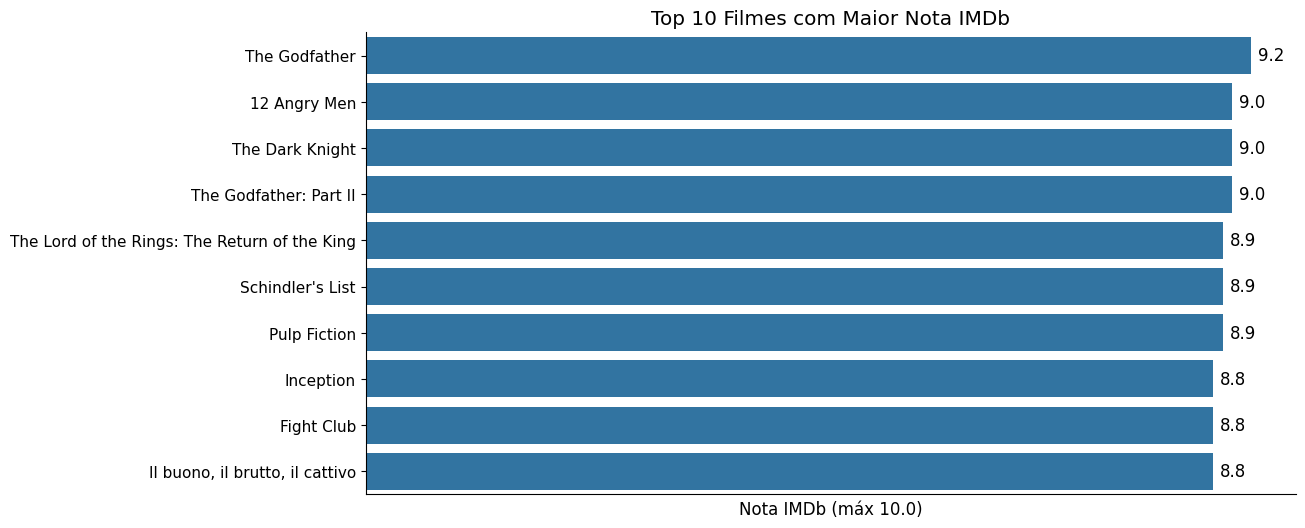

In [131]:
top_IMDb = df[["Title", "IMDB_Rating"]].sort_values(by="IMDB_Rating", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_IMDb, y="Title", x="IMDB_Rating")
ax.bar_label(ax.containers[0], fmt='%.1f', padding=5)
plt.title("Top 10 Filmes com Maior Nota IMDb")
plt.ylabel("")
plt.xlabel("Nota IMDb (máx 10.0)")
plt.xticks(ticks=[])

plt.show();

***Top 10 filmes com maior quantidade de votos***

Abaixo veremos os 10 filmes com maior quantidade de votos

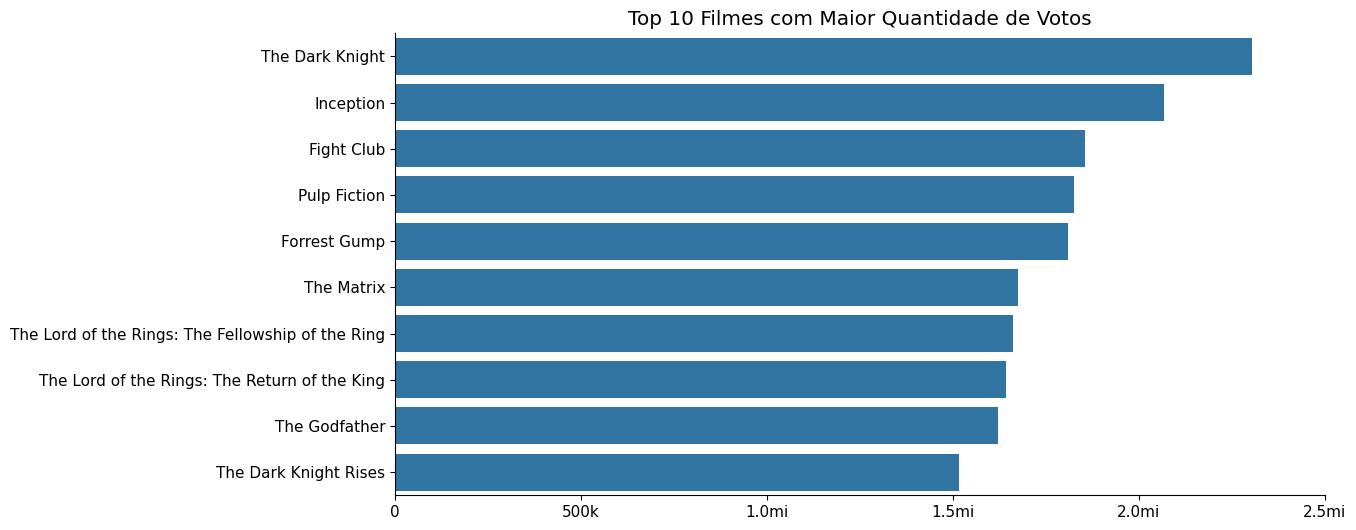

In [132]:
top_votes = df[["Title", "No_of_Votes"]].sort_values(by="No_of_Votes", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_votes, x="No_of_Votes", y="Title")
plt.title("Top 10 Filmes com Maior Quantidade de Votos")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=plt.xticks()[0], labels=[format_gross(x) for x in plt.xticks()[0]])
plt.show();

***Top 10 gêneros mais frequentes***

Abaixo apresentamos os 10 gêneros que mais apareceram em nosso dataset

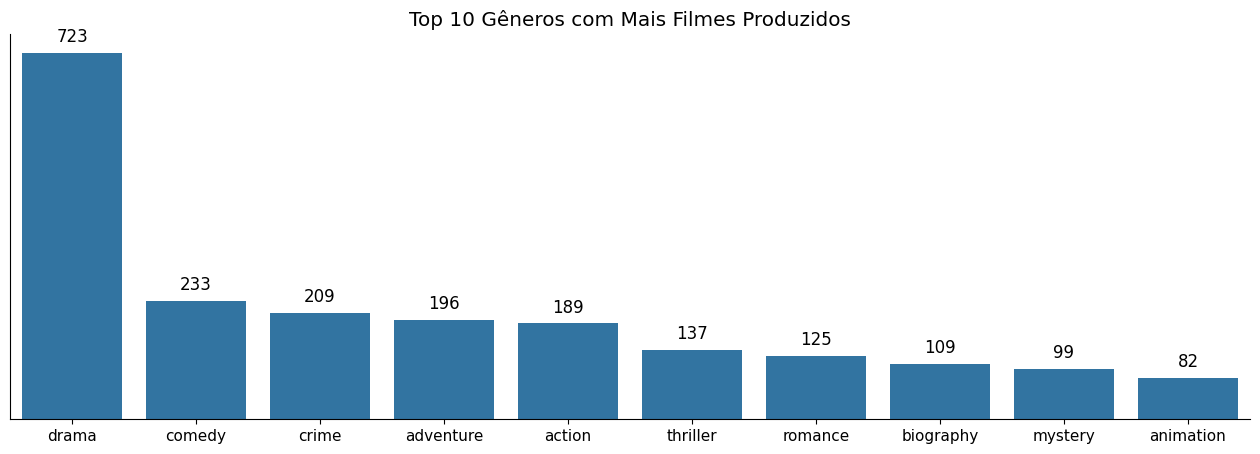

In [133]:
from collections import Counter

raw_genres_list = df["Genre"].tolist()
genres_list = [genre for sublist in raw_genres_list for genre in sublist]
top_genres = Counter(genres_list).most_common(10)

ax = sns.barplot(x=[genre[0] for genre in top_genres], y=[genre[1] for genre in top_genres])
ax.bar_label(ax.containers[0], padding=5)
plt.title("Top 10 Gêneros com Mais Filmes Produzidos")
plt.xlabel("")
plt.ylabel("")
plt.yticks(ticks=[])

plt.show();


***Top 10 anos com mais lançamentos***

No gráfico abaixo apresentamos os 10 anos que fizeram mais filmes 

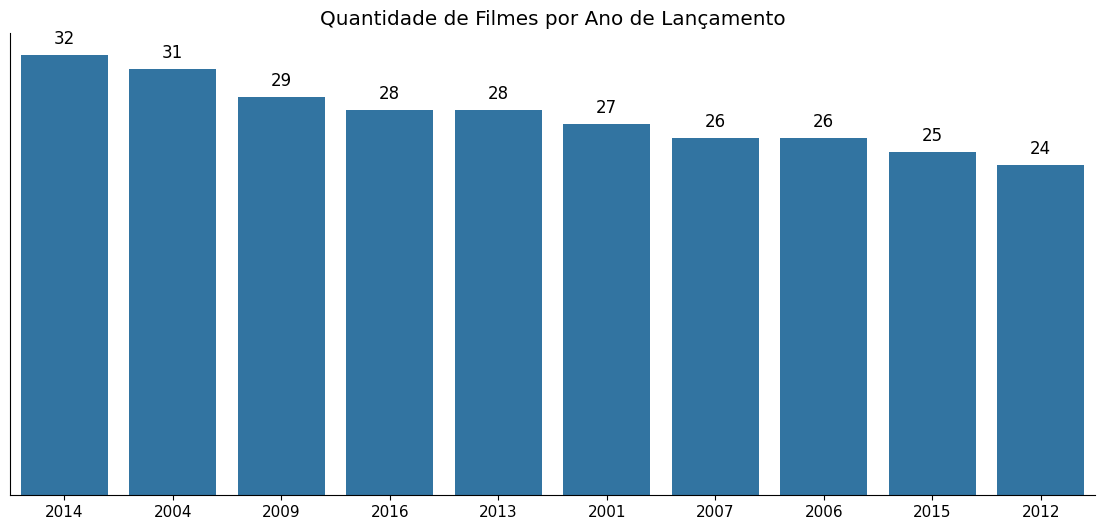

In [134]:
plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Released_Year", order=df["Released_Year"].value_counts().index[:10])

ax.bar_label(ax.containers[0], padding=5)
plt.title("Quantidade de Filmes por Ano de Lançamento")
plt.xlabel("")
plt.ylabel("")
plt.yticks(ticks=[])
plt.show()

<br>

### Relações entre dados

***Relação de IMDB_Rating x No_of_Votes***

Apresentaremos a relação de filmes com maior nota do IMDb com a quantidade de votos. Em geral, filmes com maior quantidade de votos tendem a ter uma nota mais estável, podendo assim nos levar até os melhores filmes por densidade de avaliação e maior nota pelo IMDb. 

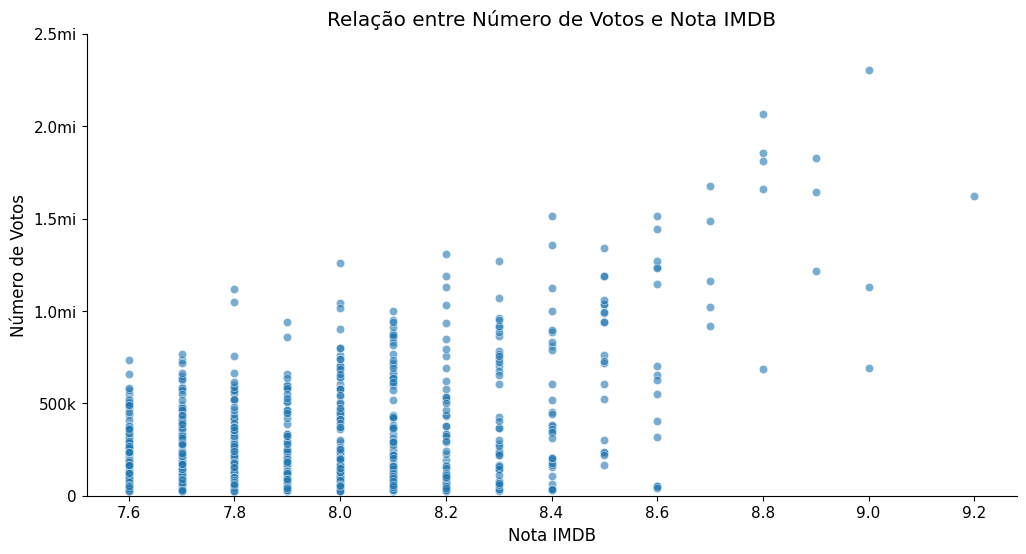

In [135]:
plt.figure(figsize=(12,6))
plt.ylim(0, df["No_of_Votes"].max() * 1.05)
sns.scatterplot(data=df, y="No_of_Votes", x="IMDB_Rating", alpha=0.6)
plt.title("Relação entre Número de Votos e Nota IMDB")
plt.ylabel("Número de Votos")
plt.xlabel("Nota IMDB")
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])
plt.show()

Analisando a relação acima apresentada pelo gráfico, podemos concluir que:

- Há uma tendência de que os filmes com uma quantidade de avaliação mais alta, também possuem uma nota ligeiramente mais alta no IMDb;

- Observamos também a presença de algumas notas extremas tendo pouquíssimas avaliações comparadas com as demais;

<br>

<a id="question_1"></a>
**Tabela de top 10 filmes por nota IMDb e quantidade de avaliação**

Logo abaixo, temos uma tabela mostrando os 10 melhores filmes levando em conta a quantidade de votos e o valor do IMDb.

In [136]:
top_votes = df.sort_values(by="No_of_Votes", ascending=False).head(10)
top_votes_table = top_votes[["Title", "IMDB_Rating", "No_of_Votes"]]

top_votes_table


,Title,IMDB_Rating,No_of_Votes
2,The Dark Knight,9.00,2303232
8,Inception,8.80,2067042
9,Fight Club,8.80,1854740
6,Pulp Fiction,8.90,1826188
11,Forrest Gump,8.80,1809221
14,The Matrix,8.70,1676426
10,The Lord of the Rings: The Fellowship of the Ring,8.80,1661481
5,The Lord of the Rings: The Return of the King,8.90,1642758
1,The Godfather,9.20,1620367
63,The Dark Knight Rises,8.40,1516346


***Tempo de duração x Nota_IMDb***

Agora vamos tentar comprovar a teoria de que filmes mais longos tendem a ter maior sucesso. Logo abaixo, iremos criar um gráfico para podermos observar a distribuição dos dados vindo de tempo de duração por minuto e comparar com a nota dada pelo IMDb  

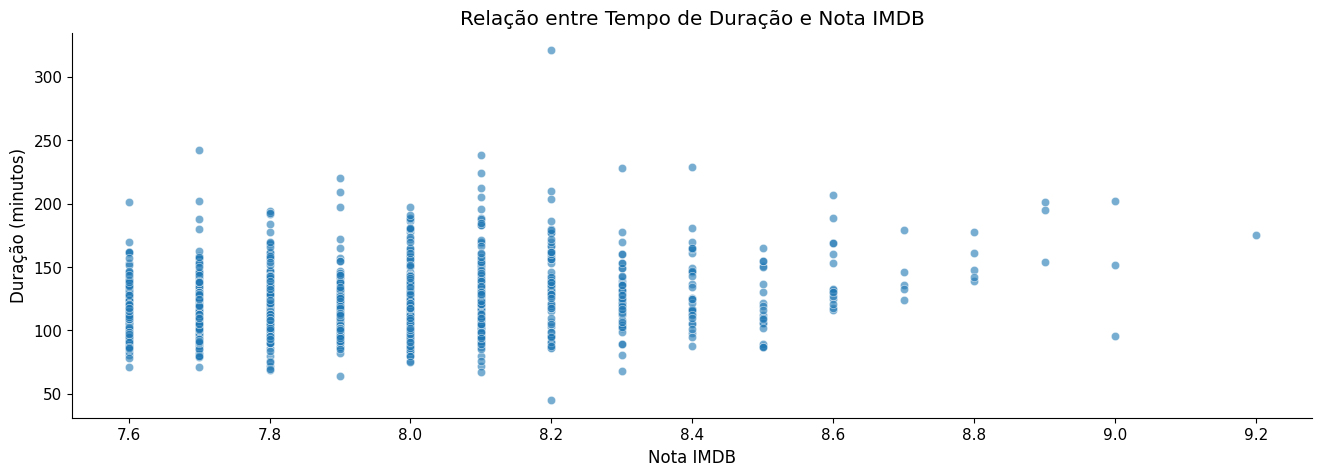

In [137]:

sns.scatterplot(data=df, y="Runtime", x="IMDB_Rating", alpha=0.6)
plt.title("Relação entre Tempo de Duração e Nota IMDB")
plt.ylabel("Duração (minutos)")
plt.xlabel("Nota IMDB")
plt.show()

Analisando o grafico de `Runtime` x `IMDB_Rating`, podemos concluir que:

- Não existe um padrão que indique que filmes mais longos são melhores, visto que todas as notas tem uma grande variação da duração de suas produções;

- A duração do filme não é um fator determinante para a nota no IMDb. Embora filmes muito longos possam ocasionalmente ter sucesso, a avaliação do público depende mais de qualidade, roteiro, direção e outros fatores do que do tempo de duração.

<br>

***Relação Released_Year X Gross_Revenue***

Agora iremos ver quais são os fatores determinantes para uma maior bilheteria, e começamos com `Released_Year`.

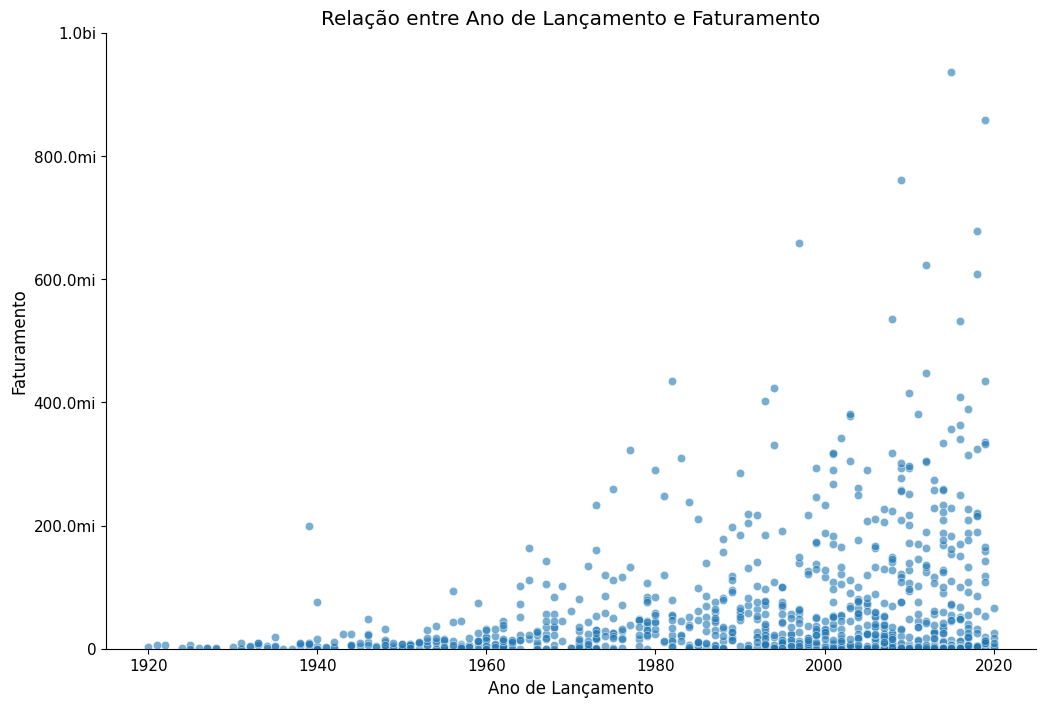

In [138]:
plt.figure(figsize=(12, 8))
plt.ylim(0, df["Gross_Revenue"].max() * 1.05)
sns.scatterplot(data=df, x="Released_Year", y="Gross_Revenue", alpha=0.6)
plt.title("Relação entre Ano de Lançamento e Faturamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Faturamento")
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])
plt.show()

Analisando o gráfico `Released_Year` x `Gross_Revenue` podemos concluir que:

- Filmes lançados mais recentemente (anos 2000 em diante) tendem a ter faturamento maior. Há poucos filmes antigos (antes de 1980) que alcançam números altos, enquanto os lançamentos recentes têm maiores bilheterias.

- O ano de lançamento é um fator determinante para bilheteria, embora tenha uma pequena disperção entre filmes mais recentes.

<br>

***Relação entre `IMDB_Rating` x `Gross_Revenue`***

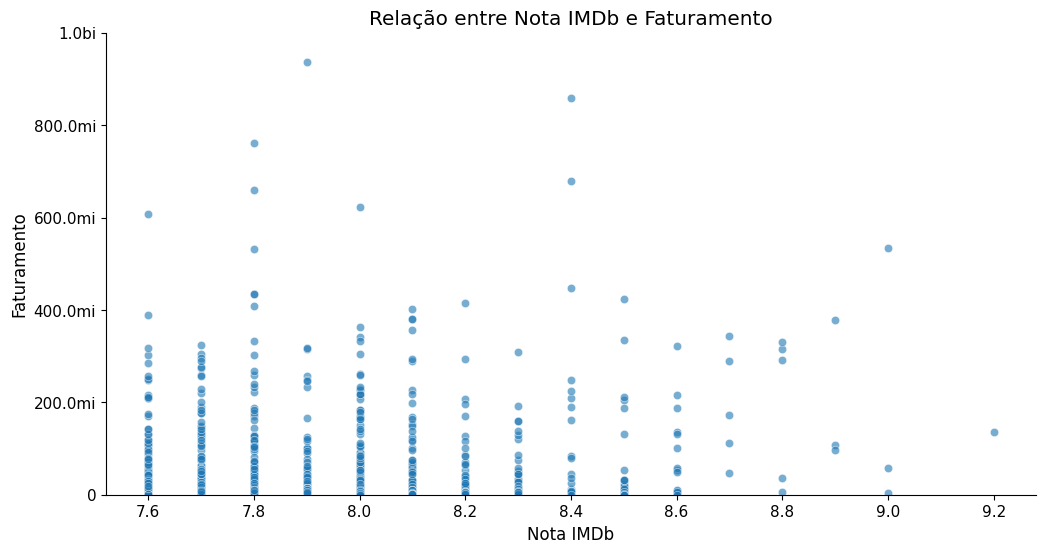

In [139]:
plt.figure(figsize=(12, 6))
plt.ylim(0, df["Gross_Revenue"].max() * 1.05)
sns.scatterplot(data=df, x="IMDB_Rating", y="Gross_Revenue", alpha=0.6)
plt.title("Relação entre Nota IMDb e Faturamento")
plt.xlabel("Nota IMDb")
plt.ylabel("Faturamento")
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])

plt.show()

Analisando dados de `Gross_Revenue` x `IMDB_Rating` podemos concluir que:

- Existe uma variação vertical muito ampla, tendo uma grande variação de bilheteria independente da nota;

- A `IMDB_Rating` não é um fator determinante para a bilheteria por não seguir um padrão e por sua grande variação nos dados, a nota pode ser um indicativo de qualidade percebida, mas não de retorno financeiro;

- A maior quantidade dos filmes concentra-se em notas do IMDb entre 7.6 e 8.6, isso demonstra que não é necessário um fime ter uma nota alta do IMDb para ele ter uma bilheteria maior.

<br>

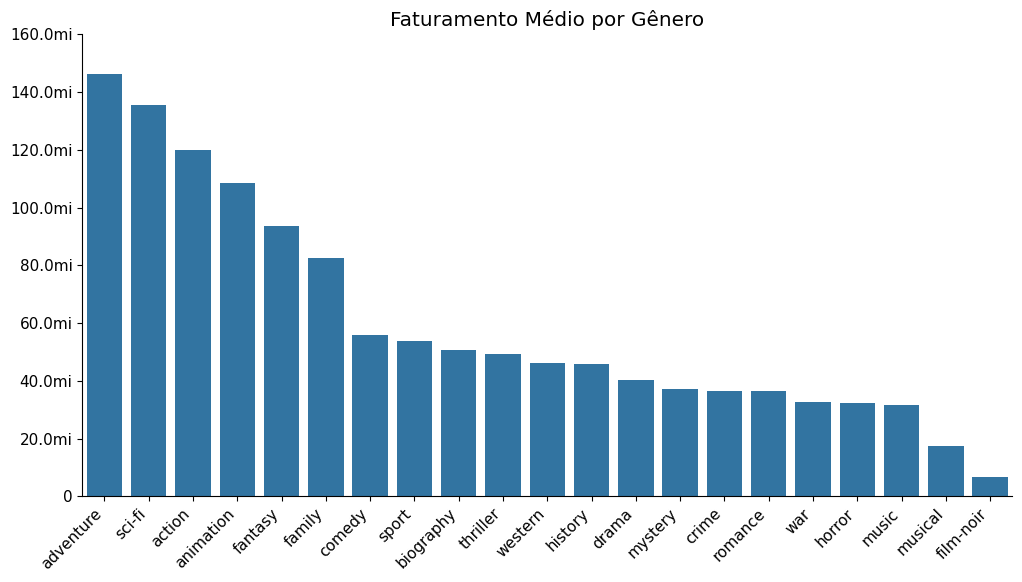

In [140]:
df_exploded = df.explode('Genre')

gross_by_genre = df_exploded.groupby('Genre')['Gross_Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gross_by_genre.index, y=gross_by_genre.values)
plt.title("Faturamento Médio por Gênero")
plt.xlabel("")
plt.ylabel
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])
plt.show()

Analisando os dados entre a média de `Gross_Revenue` x `Genre` podemos concluir que:

- O gênero é um fator determinante para uma maior bilheteria

<br>

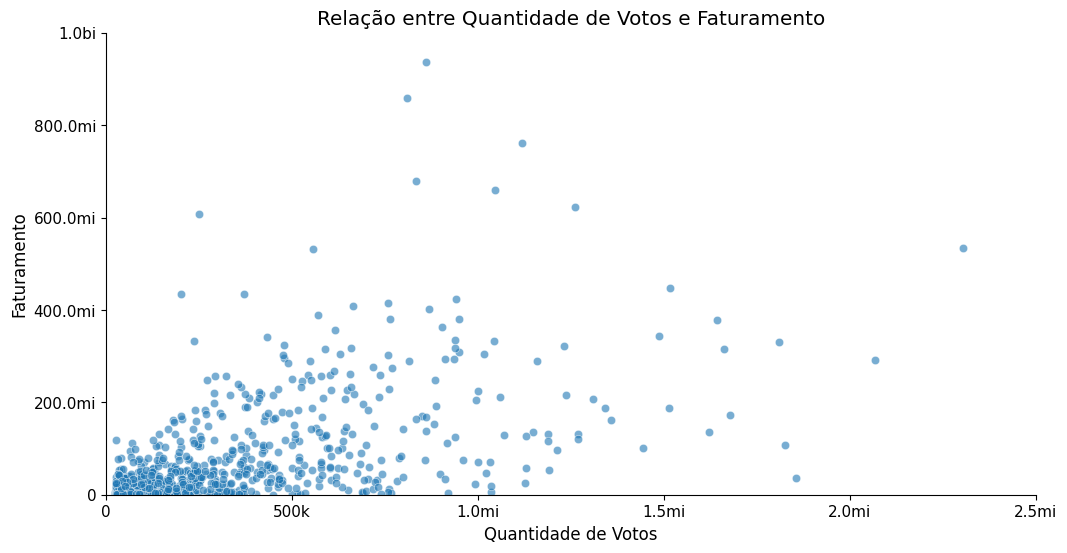

In [141]:
plt.figure(figsize=(12, 6))
plt.ylim(0, df["Gross_Revenue"].max() * 1.05)
plt.xlim(0, df["No_of_Votes"].max() * 1.05)
sns.scatterplot(data=df, x="No_of_Votes", y="Gross_Revenue", alpha=0.6)
plt.title("Relação entre Quantidade de Votos e Faturamento")
plt.xlabel("Quantidade de Votos")
plt.ylabel("Faturamento")
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])
plt.xticks(ticks=plt.xticks()[0], labels=[format_gross(x) for x in plt.xticks()[0]])
plt.show()

Analisando o gráfico entre `Quantidade de Votos` e `Faturamento (Gross_Revenue)`, podemos observar que:

- Existe uma grande disperção de dados, sugerindo que a quantidade de votos não é um fator crucial para um grande faturamento. 

Esses resultados sugerem que a quantidade de votos não é um fator relevante para o sucesso financeiro.'

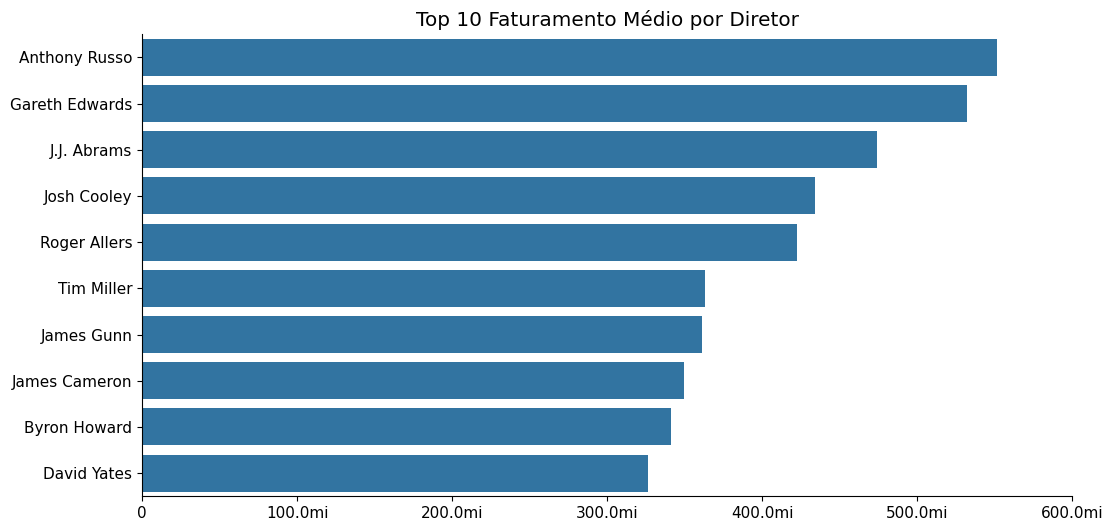

In [142]:
gross_by_director = df.groupby('Director')['Gross_Revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=gross_by_director.values, y=gross_by_director.index)
plt.title("Top 10 Faturamento Médio por Diretor")
plt.xlabel
plt.ylabel("")
plt.xticks(ticks=plt.xticks()[0], labels=[format_gross(x) for x in plt.xticks()[0]])
plt.show()

Analisando os dados entre `Director` X média de `Gross_Revenue` podemos dizer que:

- O diretor é um fator importante, mas não é o principal fator determinante do faturamento;

- Temos que levar em conta que diretores com poucos filmes de grande sucesso aparecem bem no ranking, mas isso não significa que tenham influência sistemática sobre o Gross_Revenue.

<br>

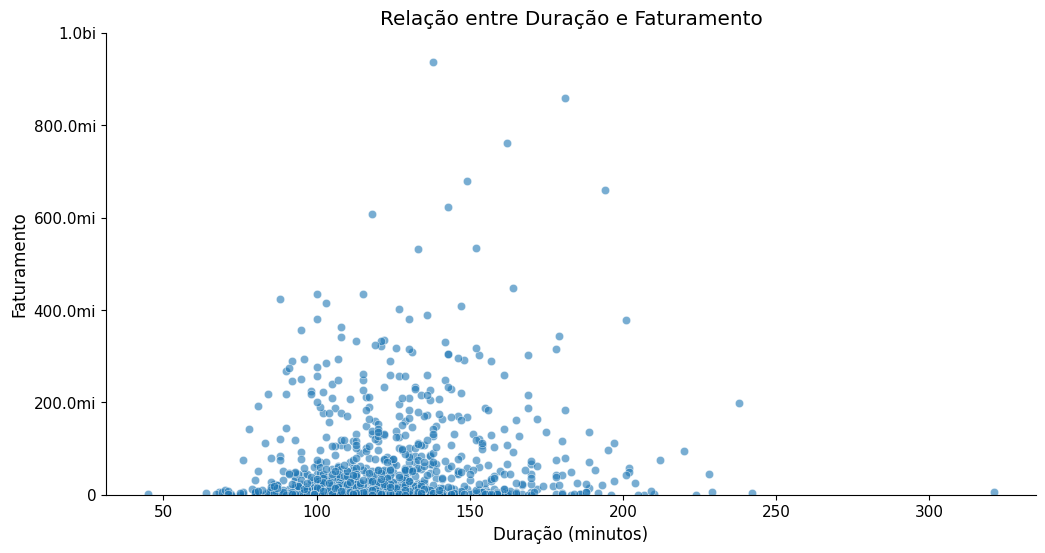

In [143]:
plt.figure(figsize=(12, 6))
plt.ylim(0, df["Gross_Revenue"].max() * 1.05)
sns.scatterplot(data=df, x="Runtime", y="Gross_Revenue", alpha=0.6)
plt.title("Relação entre Duração e Faturamento")
plt.xlabel("Duração (minutos)")
plt.ylabel("Faturamento")
plt.yticks(ticks=plt.yticks()[0], labels=[format_gross(x) for x in plt.yticks()[0]])
plt.show()

Analisando os dados entre `Director` X média de `Runtime` podemos dizer que:

- O runtime não determina a bilheteria, temos fimes com diversos tempos iguais mas com alta variação;

- O que vemos é que o mercado tende a concentrar filmes entre 90–150 minutos, mas o sucesso financeiro depende de outros fatores.

<br>

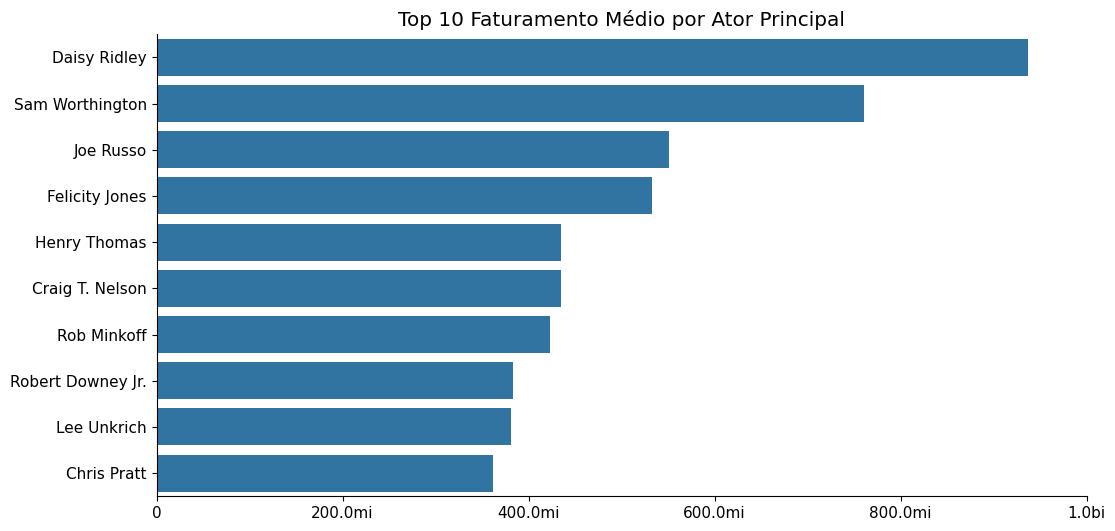

In [144]:
gross_by_star1 = df.groupby('Star1')['Gross_Revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=gross_by_star1.values, y=gross_by_star1.index)
plt.title("Top 10 Faturamento Médio por Ator Principal")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=plt.xticks()[0], labels=[format_gross(x) for x in plt.xticks()[0]])
plt.show()

Analisando os dados entre `Star1` X média de `Runtime` podemos dizer que:

- A escolha dos atores está diretamente relacionada com a bilheteria dos filmes;

- Pessoas podem escolher assistir ou não um filme por conta da participação de seu ator/atriz favoritos.

<br>

***Conclusão***

Nesta seção, exploramos o dataset cinematográfico. Identificamos fatores que influenciam o sucesso financeiro e crítico dos filmes, como gênero, ano de lançamento, e participação de diretores e atores renomados. Observamos que:

- Gêneros como aventura, ação e ficção científica tendem a gerar maiores bilheterias.
- Filmes lançados mais recentemente apresentam maior arrecadação, refletindo mudanças no mercado e no público.
- Atores e diretores de destaque podem influenciar o sucesso financeiro, mas não são fatores isolados.
- A duração do filme e a nota no IMDb não são determinantes para a bilheteria, embora possam indicar qualidade percebida.

Esses insights fornecem uma base sólida para responder às questões propostas no início do projeto e orientar futuras análises e decisões no setor cinematográfico.

---

<a id="conclusion"></a>
# 5 - Conclusão

### Insights

Após analisar o projeto, podemos destacar os seguintes insights:

**Fatores que influenciam o sucesso crítico**:

- Nota IMDb - Filmes com maior número de votos tendem a ter notas mais estáveis, indicando que avaliações mais numerosas refletem melhor a opinião geral do público.
- Meta_score - Críticas especializadas são mais rigorosas, mas filmes com alta pontuação geralmente possuem qualidade técnica e narrativa superior.

**Relação entre variáveis**:
- Nota IMDb x Bilheteria - Não há uma relação direta entre nota alta e bilheteria elevada. Filmes com notas medianas podem ter grande sucesso financeiro.
- Duração x Nota IMDb - A duração do filme não é um fator determinante para sua avaliação crítica.
- Quantidade de votos x Bilheteria - A quantidade de votos não é um fator crucial para o faturamento, mas pode indicar maior engajamento do público.

**Qualidade dos dados**:
- O dataset apresentou dados ausentes em colunas como `Gross_Revenue`, `Meta_score` e `Certificate`. Esses valores foram tratados com modelos de aprendizado de máquina ou preenchidos com categorias padrão, garantindo consistência na análise.

**Recomendações**:
- **Estratégias para novos filmes** - Investir em gêneros populares (Aventura, Sci-fi, Animação, Aventura...), atores renomados e diretores de destaque pode aumentar as chances de sucesso financeiro e crítico.

Esses insights fornecem uma base sólida para decisões estratégicas no setor cinematográfico, seja para produção de novos filmes ou para análise de tendências de mercado.

<br>

### Perguntas

**1 - Qual filme você recomendaria para uma pessoa que você não conhece?**

Para podermos determinar se um filme é realmente bom, teremos que fazer uma relação entre quantidade de votos e a nota do IMDb para podermos chegar até uma resposta mais sólida. 

Analisando a tabela na seção 4 - [Tabela de top 10 filmes por nota IMDb e quantidade de avaliação](#question_1), podemos recomendar com certeza absoluta o filme `The Dark Knight`, com _2.303.232_ votos e com uma surpreendente nota _9.0_.

<br>

**2 - Quais são os principais fatores relacionados com alta expectativa de faturamento de um filme?**

Assim como bem analisamos na seção 4, podemos tirar conclusões acertivas de possíveis variáveis que influenciam para uma alta bilheteria, sendo elas:

- _Ano de lançamento_ - Provavelmente por diversos fatores econômicos e sociais que se desenvolveram durante os anos, podemos afirmar que quanto mais recente um filme é, ele tem mais faturamento por bilheteria;

- _Gênero_ - A escolha do gênero influência no rendimento, onde filmes sobre Aventura, Ficção Ciêntifica, Ação, Animação, Aventura ... Tendem a ser mais rentáveis.

- _Elenco_ - A escolha do elenco de produção do filme é um fator importante para se criar um filme com grande faturamento.

<br>

**3 - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

Podemos tirar dados importantes da coluna `Overview`, separando palavras chaves podemos localizar palavras que são importantes para referir qual o gênero do filme, por exemplo:

"fight", "war", "mission" em Ação; 

"love", "family", "heart" em Romance; 

"space", "alien", "future" em Ficção Científica);

Além de gênero, a coluna também permite identificar temas transversais (amizade, vingança, redenção, família), que podem enriquecer sistemas de recomendação.



---

<a id='model_imdb'></a>
# 6 - Questão 3 - Modelagem Preditiva da Nota IMDb

### Modelo preditivo para achar valor do IMDb

Com os dados que temos, faremos um modelo de predição e responderemos as seguintes perguntas:

***Quais variáveis e/ou suas transformações você utilizou e por quê?***

Numéricos: `Released_Year`, `Runtime`, `Meta_score`, `No_of_Votes` e `Gross_Revenue` - Importante para podermos mensurar com base nos dados que apresentam caracteristicas importantes dos filmes.

Não numéricos: `Genre` e `Certificate` - Usei o método `One-Hot Encoding` para transformar ambos os dados em binário para que possam ser bem localizados e interpretados pelo modelo de regressão 

<br>

***Qual tipo de problema estamos resolvendo (regressão, classificação)?***
 
 - Estamos resolvendo um problema de _regressão_, visto que o valor do IMDb é um valor numérico, e não uma categoria em questão;

<br>

***Qual modelo melhor se aproxima dos dados e quais seus prós e contras?***

O modelo escolhido para esta abordagem foi o **RandomForestRegressor**

Prós: 
- Muito eficiente e com pequena margem de erro em predições de regressão;

- É menos sensíveis aos outliers evitando respostas totalmente desproporcionais;

- Por ter várias árvores de decisão, ele gera dados mais generalizados do que árvores únicas.

Contras:
- Precisa de mais tempo de processamento, geralmente demorando mais para ser processado do que outros modelos de regressão linear;

<br>

***Qual medida de performance do modelo foi escolhida e por quê?***

Foi escolhida a medida de performance Root Mean Squared Error (RMSE), por que o objetivo principal do RMSE é avaliar a qualidade das previsões de um modelo, medindo o quanto elas se alinham com a realidade, e tem suas vantagens por ser facilmente interpretável.

### Criação do modelo de regressão

***Formatando dados***

Nosso modelo de regressão RandomForestRegressor trabalha apenas com números, e nosso objetivo é criar um modelo preciso treinado com todas as variáveis possíveis, entretanto, temos alguns valores que precisam ser formatados.
 

In [145]:
genre_exploded = df.explode("Genre")
genre_dummies = pd.get_dummies(genre_exploded["Genre"], prefix="Genre").groupby(level=0).sum()

certificate_dummies = pd.get_dummies(df['Certificate'], prefix='Certificate')


df_only_numbers = pd.concat([df[["Released_Year", "Runtime", "IMDB_Rating", "No_of_Votes", "Gross_Revenue", "Meta_score"]], genre_dummies, certificate_dummies], axis=1)

Agora que temos todos os dados formatados para números na variável `df_only_numbers` agora sim podemos definir o que iremos prever e o que daremos de variaveis para nosso modelo usar de base. 

***Definindo variáveis de treino***

Agora, separamos nossas features (X) da variável que queremos prever (y).

In [146]:
from sklearn.model_selection import train_test_split

X = df_only_numbers

y = df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Treinando o modelo***

Agora poderemos treinar e analisar nosso modelo.

In [147]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

imdb_model = RandomForestRegressor(random_state=42, n_estimators=100)
imdb_model.fit(X_train, y_train)

predictions = imdb_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0006


### Questão 4 - Previão The Shawshank Redemption

***Importando dados exemplo***

Vamos criar um dataFrame com os dados solicitados e formatados para ser usado por nosso modelo de regressão criado anteriormente. 

In [ ]:
data = {
    'Released_Year': [1994],
    'Runtime': [142],
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Gross_Revenue': [28341469],
    'Genre': ["Drama"],
    'Certificate': ["A"],
}

shawshank_df = pd.DataFrame(data)

# Função para formatar os dados de entrada conforme o modelo treinado
def format_data(df):
    if 'Genre' in df.columns:
        df = df.copy()
        df['Genre'] = df['Genre'].apply(lambda x: x if isinstance(x, list) else [])
        df_exploded = df.explode('Genre')
        genre_dummies = pd.get_dummies(df_exploded['Genre'], prefix='Genre').groupby(level=0).sum()
    else:
        genre_dummies = pd.DataFrame()

    if 'Certificate' in df.columns:
        certificate_dummies = pd.get_dummies(df['Certificate'], prefix='Certificate')
    else:
        certificate_dummies = pd.DataFrame()

    numeric_columns = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross_Revenue']
    numeric_data = df[numeric_columns].copy()

    formatted_data = pd.concat([numeric_data, genre_dummies, certificate_dummies], axis=1)

    formatted_data.fillna(0, inplace=True)
    formatted_data_aligned = formatted_data.reindex(columns=X_train.columns, fill_value=0)
    return formatted_data_aligned

shawshank_df_formatted = format_data(shawshank_df)

shawshank_prediction = imdb_model.predict(shawshank_df_formatted)
print(f"Predição para a nota IMDb do filme: 'The Shawshank Redemption': {shawshank_prediction[0]:.2f}")

Predição para a nota IMDb do filme: 'The Shawshank Redemption': 7.60


In [149]:

model_pathname = "../models/imdb_rating_model.pkl"
# joblib.dump(imdb_model, model_pathname)

loaded_model = joblib.load(model_pathname)
loaded_model.predict(shawshank_df_formatted)

array([7.6])